# Solving Optimization Problems

In this section, we explore how to solve an optimization problem 
once it has been defined, as outlined in the previous [section](./modeling.md).
We can solve optimization problems using one of the optimization algorithms 
(also known as optimizers) from modOpt.
Algorithms in modOpt are classified as either performant or educational algorithms.
[Performant algorithms](./performant_algs.md) are popular, widely-used algorithms 
sourced from external libraries,
while [educational algorithms](./educational_algs.md) are transparent algorithms fully implemented 
in modOpt, designed to support beginners and students learning optimization.
Some of the performant algorithms are written in low-level languages such as C and Fortran.
However, modOpt interfaces with these algorithms through precompiled sources,
eliminating the challenges faced by users when compiling them locally on their computers.
Educational algorithms, although primarily written in Python, are competitive with their
performant counterparts on certain problems.

## A simple way to solve a problem

Unlike the educational algorithms, users have an easy, alternate way 
to optimize using the performant algorithms.
This approach uses a minimal API that allows users to solve optimization problems using 
a single line of code once the problem is defined.
To demonstrate this, we solve the simple optimization problem:

$$
\underset{x_1, x_2 \in \mathbb{R}}{\text{minimize}} \quad x_1^2 + x_2^2

\newline
\text{subject to} \quad x_1 \geq 0
\newline
\quad \quad \quad \quad x_1 + x_2 = 1
\newline
\quad \quad \quad \quad x_1 - x_2 \geq 1 
$$

In the code below, we use the `ProblemLite` class to model this problem.
To learn more about other modeling options supported by modOpt, please visit
the [Defining Optimization Problems](./modeling.md) section.

In [7]:
import numpy as np
import modopt as mo

x0 = np.array([50., 5.])            # initial guess
xl = np.array([0., -np.inf])        # variable lower bounds
cl = np.array([1., 1.])             # constraint lower bounds
cu = np.array([1., np.inf])         # constraint upper bounds
c_scaler = np.array([10., 100.])    # constraint scaler

def obj(x):
    return np.sum(x**2)
def grad(x):    
    return 2 * x
def con(x):
    return np.array([x[0] + x[1], x[0] - x[1]])
def jac(x):
    return np.array([[1., 1], [1., -1]])

# Define the problem as a ProblemLite object 
# A ProblemLite object acts as a container for the problem constants, functions, and their derivatives
problem = mo.ProblemLite(
    x0, 
    obj=obj, 
    grad=grad, 
    con=con, 
    jac=jac, 
    cl=cl, 
    cu=cu,
    xl=xl,
    c_scaler = c_scaler,
    name='constrained_quadratic'
    )

/Users/modopt/modopt/core/problem_lite.py:198: UserWarning: Objective Hessian function "obj_hess" not provided. Finite differences will be used if objective Hessian computation is necessary.
  warnings.warn('Objective Hessian function "obj_hess" not provided. Finite differences will be used if objective Hessian computation is necessary.')
/Users/modopt/modopt/core/problem_lite.py:209: UserWarning: Lagrangian Hessian function "lag_hess" not provided. Finite differences will be used if Lagrangian Hessian computation is necessary.
  warnings.warn('Lagrangian Hessian function "lag_hess" not provided. Finite differences will be used if Lagrangian Hessian computation is necessary.')


Once the problem object is defined and ready to be used by an optimizer,
simply call the `optimize` function by specifying a `solver` and its configuration using `solver_options`.
Here, we use the `SLSQP` optimizer with the options `maxiter` set to $100$ and `ftol` set to $1e-6$.
This will run the optimizer and return the results in the form of a dictionary.

In [8]:
results = mo.optimize(
    problem, 
    solver='SLSQP', 
    solver_options={'maxiter': 100, 'ftol': 1e-6}
    )
print(results)

          message: Optimization terminated successfully
          success: True
           status: 0
              fun: 1.0000000000063949
                x: [ 1.000e+00 -3.197e-12]
              nit: 2
              jac: [ 2.000e+00 -6.395e-12]
             nfev: 2
             njev: 2
  total_callbacks: 9
        obj_evals: 2
       grad_evals: 2
       hess_evals: 0
        con_evals: 3
        jac_evals: 2
 reused_callbacks: 0
          out_dir: constrained_quadratic_outputs/2025-02-03_09.55.11.552413



## The standard way of solving problems in modOpt

The standard and recommended way to optimize a problem is by directly using the
optimizer class objects.
This approach involves importing the optimizer of your choice from the library,
setting tolerances and other parameters for the chosen optimizer, and finally solving the problem.
Although slightly more verbose, using the optimizer classes can be more beneficial.
It provides access to additional optimizer information and offers more debugging options,
such as verifying the correctness of the user-provided first derivatives with the `check_first_derivatives` method.

The following code optimizes the problem above using the same optimizer but follows the recommended approach.

In [9]:
# Create an optimizer object with the same problem and options
optimizer = mo.SLSQP(
    problem, 
    solver_options={'maxiter': 100, 'ftol': 1e-6}
    )

# Check the first derivatives defined in the ProblemLite object
optimizer.check_first_derivatives(x=x0, step=1e-6)

# Solve the problem and get the results
results = optimizer.solve()

# Print the results
optimizer.print_results()


----------------------------------------------------------------------------
Derivative type | Calc norm  | FD norm    | Abs error norm | Rel error norm 
----------------------------------------------------------------------------

Gradient        | 1.0050e+02 | 1.0050e+02 | 1.2913e-06     | 1.2849e-08    
Jacobian        | 1.4213e+02 | 1.4213e+02 | 1.0008e-06     | 7.0416e-09    
----------------------------------------------------------------------------


	Solution from Scipy SLSQP:
	----------------------------------------------------------------------------------------------------
	Problem                  : constrained_quadratic
	Solver                   : scipy-slsqp
	Success                  : True
	Message                  : Optimization terminated successfully
	Status                   : 0
	Total time               : 0.0024521350860595703
	Objective                : 1.0000000000063949
	Gradient norm            : 2.000000000006395
	Total function evals     : 2
	Total gradient

From the output of `check_first_derivatives()`, we can see that the derivatives we defined earlier are correct.
We also printed the results using the optimizer's built-in `print_results()` method.
However, note that the callbacks made by the optimizer in this case is more than in the previous case.
These additional callbacks were made by the optimizer when checking the first derivatives using finite differences.

## List of optimization algorithms

We only looked at the `SLSQP` optimizer in the examples above.
However, there are several more optimizers in the modOpt library.
For more information on any specific optimizer, please visit its page linked below.

```{toctree}
:maxdepth: 2

performant_algs
educational_algs
```

## Live visualization of optimization
Users have the option to visualize scalar variables during an optimization.
There are two categories of variables that can be visualized.
The first category includes the user-provided problem functions, derivatives, and their inputs,
which are called the **callback_variables** because these functions are
called repeatedly by the optimizer with its inputs.
Variables in this category include the optimization variables, objective, constraints, objective gradient,
and constraint jacobian, among others.
The second category, called the **optimizer_variables**, includes variables that are
made available by the optimizer after each optimization iteration.
These variables are optimizer-dependent and vary widely from one optimizer to another.
To see the list of variables made available by each optimizer, check the `available_outputs` attribute,
as shown in the code snippet below.
The full list of keywords for the **callback_variables** is
`['x', 'mu', 'obj', 'con', 'grad', 'jac', 'obj_hess', 'lag_hess']`, 
where `x` represents the optimization variable vector, and `mu` represents the vector of Lagrange multipliers.

In [10]:
# Print available outputs for the SLSQP optimizer
optimizer = mo.SLSQP(problem=problem)
print(optimizer.available_outputs)

# Print available outputs for the TrustConstr optimizer
optimizer = mo.TrustConstr(problem=problem)
print(optimizer.available_outputs)

{'x': (<class 'float'>, (2,))}
{'x': (<class 'float'>, (2,)), 'obj': <class 'float'>, 'opt': <class 'float'>, 'feas': <class 'float'>, 'grad': (<class 'float'>, (2,)), 'lgrad': (<class 'float'>, (2,)), 'con': (<class 'float'>, (2,)), 'jac': (<class 'float'>, (2, 2)), 'lmult_x': (<class 'float'>, (2,)), 'lmult_c': (<class 'float'>, (2,)), 'iter': <class 'int'>, 'cg_niter': <class 'int'>, 'nfev': <class 'int'>, 'nfgev': <class 'int'>, 'nfhev': <class 'int'>, 'ncev': <class 'int'>, 'ncgev': <class 'int'>, 'nchev': <class 'int'>, 'tr_radius': <class 'float'>, 'constr_penalty': <class 'float'>, 'barrier_parameter': <class 'float'>, 'barrier_tolerance': <class 'float'>, 'cg_stop_cond': <class 'float'>, 'time': <class 'float'>}


To visualize scalar variables of interest, simply pass them as a list using the keyword argument `visualize` when instantiating an optimizer.
The callback variable names will always be prefixed with `callback_` in the visualization. 
If a variable name is available in both **callback_variables** and **optimizer_variables**, both will be plotted.
The code below demonstrates how to visualize the optimization variable $x_1$, the objective, and optimality 
when using the `TrustConstr` optimizer.
Note that the `keep_viz_open` parameter must be set to `True` to keep
the plot open once the optimization is complete.

/Users/venv/lib/python3.9/site-packages/scipy/optimize/_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


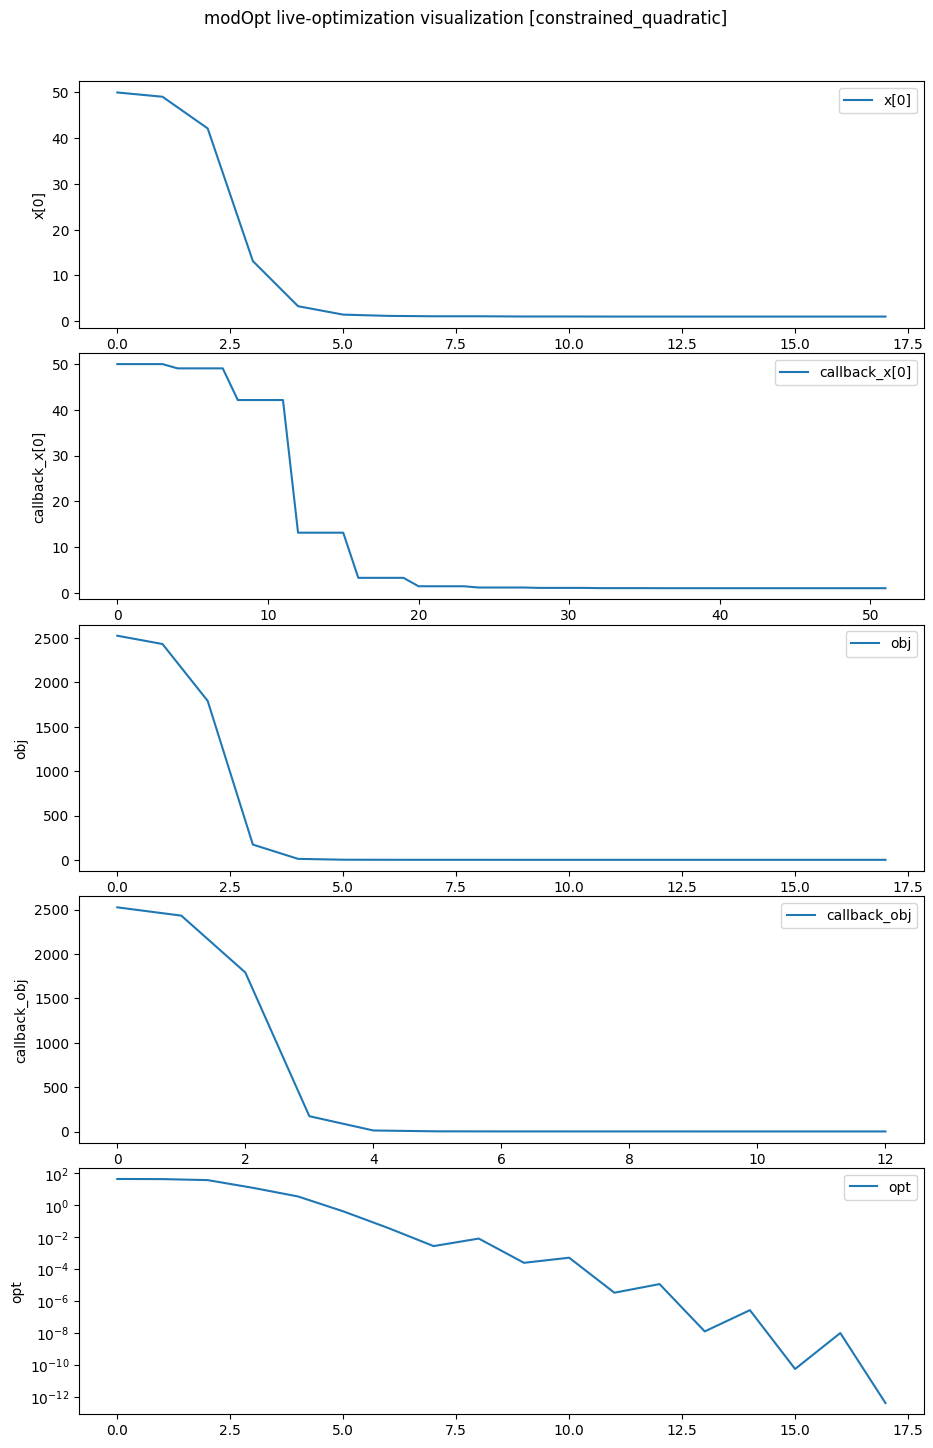


	Solution from Scipy trust-constr:
	----------------------------------------------------------------------------------------------------
	Problem                       : constrained_quadratic
	Solver                        : scipy-trust-constr
	Method                        : tr_interior_point
	Success                       : True
	Message                       : `gtol` termination condition is satisfied.
	Status                        : 1
	Total time                    : 9.935916662216187
	Objective                     : 1.0000320268995626
	Gradient norm                 : 2.000032026643136
	Optimality                    : 4.3125588820511207e-13
	Max. constr. violation        : 0.0
	Trust region radius           : 639535.7360242795
	Constraint penalty            : 1.0
	Barrier parameter             : 3.200000000000001e-05
	Barrier tolerance             : 3.200000000000001e-05
	Total function evals          : 13
	Total gradient evals          : 13
	Total Hessian evals           : 0
	To

In [15]:
%matplotlib inline

optimizer = mo.TrustConstr(problem=problem, 
                           solver_options={'maxiter': 100, 'gtol': 1e-12},
                           visualize=['x[0]', 'obj', 'opt'],
                           keep_viz_open=True)
results   = optimizer.solve()
optimizer.print_results()

# To visualize the results, when using the `optimize` function
# mo.optimize(problem, solver='TrustConstr', visualize=['x[0]', 'obj', 'opt'], keep_viz_open=True)

Notice that for $x_1$ and the objective, we see two plots each--one reported from the callbacks 
and the other reported from the optimizer iterations.
The results printed at the end show the `total_callbacks` as 52 and `obj_callbacks` as 13
which match the number of points on the corresponding plots.
Similarly, we see 18 points plotted on the `x[0]`, `obj`, and `opt` plots, corresponding
to the total number of optimization iterations reported in the results.

## Recording
When optimizing a problem, users may want to record the entire optimization history
for several reasons, such as post-processing, hot-restarting an optimization that 
terminated prematurely, or for further analysis.
Refer to [Post-processing](./postprocessing.md) for details on how to access and work with optimization records.

Users can set `recording=True` to save the full history of the callbacks 
and optimizer iterations (see **callback_variables** and **optimizer_variables** discussed above).
The following code shows how to record an optimization using the same
example solved above.

In [26]:
optimizer = mo.TrustConstr(problem=problem, 
                           solver_options={'maxiter': 100, 'gtol': 1e-12},
                           recording=True)
results   = optimizer.solve()
optimizer.print_results()


	Solution from Scipy trust-constr:
	----------------------------------------------------------------------------------------------------
	Problem                       : constrained_quadratic
	Solver                        : scipy-trust-constr
	Method                        : tr_interior_point
	Success                       : True
	Message                       : `gtol` termination condition is satisfied.
	Status                        : 1
	Total time                    : 0.439133882522583
	Objective                     : 1.0000320268995626
	Gradient norm                 : 2.000032026643136
	Optimality                    : 4.3125588820511207e-13
	Max. constr. violation        : 0.0
	Trust region radius           : 639535.7360242795
	Constraint penalty            : 1.0
	Barrier parameter             : 3.200000000000001e-05
	Barrier tolerance             : 3.200000000000001e-05
	Total function evals          : 13
	Total gradient evals          : 13
	Total Hessian evals           : 0
	To

## Directory structure

When instantiating an optimizer for the first time for a problem, modOpt creates a directory for that problem, 
named using the `problem_name` with the suffix `_outputs`.
Each time a new optimizer object is instantiated for the same problem, 
modOpt creates a new directory within `{problem_name}_outputs\` based on the timestamp at the time of instantiation.
All outputs generated by modOpt for an optimization will be placed in this directory.

The optimization recording is saved as an HDF5 file named `record.hdf5`.
The relative path to the outputs directory is stored in the `out_dir` attribute of the optimizer, and all files 
available in the directory are stored in the `modopt_output_files` attribute.
The code below prints these attributes for the optimization performed above.

In [28]:
# Print the directory containing all the output files generated by the optimizer
print('Output Directory:', optimizer.out_dir)
print('Output Files:', optimizer.modopt_output_files)

Output Directory: constrained_quadratic_outputs/2025-02-03_10.51.04.574227
Output Files: ['directory: constrained_quadratic_outputs/2025-02-03_10.51.04.574227', 'modopt_results.out', 'modopt_summary.out', 'record.hdf5']


## Getting readable outputs from the optimizer

Since HDF5 files from optimizer recording are incompatible with text editors, 
users may set the `readable_outputs` option during optimizer instantiation 
to export optimizer-generated data (**optimizer_variables**) as plain text files.
For each variable listed in `readable_outputs`, a separate file is generated,
with rows representing optimizer iterations.
The list of variables allowed for `readable_outputs` is any
subset of the keys in the `available_outputs` attribute.
These dynamically updated plain text files allow users to track 
different optimization variables during the optimization.

The following code demonstrates how to set the `readable_outputs` option
for the `TrustConstr` optimizer.

In [33]:
optimizer = mo.TrustConstr(problem=problem, 
                           solver_options={'maxiter': 100, 'gtol': 1e-12},
                           readable_outputs=['obj', 'con', 'x', 'opt', 'feas'])
results   = optimizer.solve()
optimizer.print_results()

# Print the directory and its contents to see the generated readable output files
print('Output Directory:', optimizer.out_dir)
print('Output Files:', optimizer.modopt_output_files)


	Solution from Scipy trust-constr:
	----------------------------------------------------------------------------------------------------
	Problem                       : constrained_quadratic
	Solver                        : scipy-trust-constr
	Method                        : tr_interior_point
	Success                       : True
	Message                       : `gtol` termination condition is satisfied.
	Status                        : 1
	Total time                    : 0.07374691963195801
	Objective                     : 1.0000320268995626
	Gradient norm                 : 2.000032026643136
	Optimality                    : 4.3125588820511207e-13
	Max. constr. violation        : 0.0
	Trust region radius           : 639535.7360242795
	Constraint penalty            : 1.0
	Barrier parameter             : 3.200000000000001e-05
	Barrier tolerance             : 3.200000000000001e-05
	Total function evals          : 13
	Total gradient evals          : 13
	Total Hessian evals           : 0
	

From the output files listed in the console output above, we see that 
five additional plain text files 
(*'obj.out'*, *'con.out'*, *'x.out'*, *'opt.out'*, *'feas.out'*)
were generated by modOpt based on the `readable_outputs` argument 
provided to the optimizer.

## Disabling modOpt-generated outputs
By default, modOpt generates the `modopt_results.out` file along with other files,
depending on the optimizer.
To disable the generation of all output files, set `turn_off_outputs=True`
when instantiating an optimizer, as shown below.

In [35]:
optimizer = mo.TrustConstr(problem=problem, 
                           turn_off_outputs=True)

For more details on the `Optimizer` class or any of the features discussed above, 
visit the [API Reference](./api.md) page.